<a href="https://colab.research.google.com/github/Shubham-naik-ai/Jforce/blob/main/Jforce_assignment_2(Undersampling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
# Importing usefull libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/MyDrive/Jforce/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [144]:
#Loading the clean Dataset
df = pd.read_csv(working_dir_path + 'finaldata.csv')

## **Balancing Data and Modelling**

In [145]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Extract features and target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Create a RandomUnderSampler object to undersample the majority class
rus = RandomUnderSampler(random_state=42)

# Fit and transform the data using the RandomUnderSampler object
X_resampled, y_resampled = rus.fit_resample(X, y)

# Print the new class distribution after undersampling
print("Resampled class distribution: ", Counter(y_resampled))

Resampled class distribution:  Counter({0: 4174, 1: 4174})


In [146]:
columns = list(df.columns)

In [147]:
columns.pop()

'loan_status'

In [148]:
balance_df = pd.DataFrame(X_resampled, columns=columns)

In [149]:
balance_df['loan_status'] = y_resampled

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

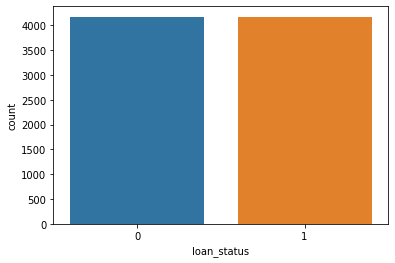

In [150]:
sns.countplot('loan_status', data = balance_df)


In [151]:
balance_df[balance_df['loan_status']==1]


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
4174,6000.0,6000.0,6000.0,0,245,221.13,4,20,0,3,...,640.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
4175,8000.0,8000.0,8000.0,0,170,282.53,3,19,7,3,...,780.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
4176,7500.0,7500.0,7450.0,0,67,251.75,2,10,0,3,...,825.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
4177,5000.0,5000.0,4950.0,0,303,153.52,0,1,0,0,...,755.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
4178,7200.0,7200.0,7200.0,0,58,240.59,1,8,5,0,...,650.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8343,1500.0,1500.0,1500.0,1,205,37.74,4,23,4,2,...,535.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
8344,15000.0,15000.0,15000.0,0,295,452.40,0,0,4,2,...,795.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1
8345,10000.0,10000.0,9750.0,0,41,330.76,1,7,6,0,...,555.0,0.0,1.0,0,0.0,0.0,0.0,1.0,0.0,1
8346,5800.0,5800.0,5725.0,0,329,184.28,0,4,2,3,...,740.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1


In [152]:
df = balance_df.copy()


In [153]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
0,2500.0,2500.0,2500.0,1,141,59.83,2,13,0,3,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0
1,5600.0,5600.0,5600.0,1,277,152.39,5,26,4,2,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0
2,5375.0,5375.0,5350.0,1,65,121.45,1,9,0,3,...,515.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0
3,9000.0,9000.0,9000.0,0,88,305.38,2,10,0,3,...,615.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0
4,10000.0,10000.0,10000.0,0,16,325.74,1,6,3,3,...,650.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0


In [154]:
features = ['funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose',
       'title', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low']

In [155]:
features

['funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'title',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low']

In [156]:
from sklearn import preprocessing

In [157]:
dataset_pr = df.copy()
     
from scipy.stats import zscore

X = dataset_pr[features].apply(zscore)
     
y = df['loan_status']
     
X.head()

,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low
0,-1.265086,-1.164858,1.755606,-0.137271,-1.357864,0.363727,-1.345453,0.843859,-0.990737,0.295244,...,-1.146276,-0.848550,-0.280041,-0.127397,-0.138103,-1.566286,-0.516931,0.642206,-1.694107,-3.856665
1,-0.590043,-0.490184,1.755606,1.084515,-0.704650,2.306873,-0.198849,0.135510,-0.555097,0.295244,...,-1.214741,-0.974578,-0.280041,-0.047140,-0.133916,-1.599845,-0.492449,0.642206,-1.694107,-3.856665
2,-0.639038,-0.544593,1.755606,-0.820033,-0.923000,-0.234165,-1.345453,0.843859,-1.644197,1.519024,...,-1.095813,-0.760250,-0.280041,0.042315,-0.132079,1.017816,-0.515592,0.642206,-1.467576,-0.658474
3,0.150326,0.249781,-0.569604,-0.613408,0.375030,-0.084692,-1.345453,0.843859,-0.990737,0.295244,...,-0.960328,-0.727140,-0.280041,0.237448,-0.125073,-0.190335,-0.378008,0.642206,-0.334924,-0.037467
4,0.368081,0.467418,-0.569604,-1.260235,0.518715,-0.682583,-0.485500,0.843859,2.058745,0.295244,...,0.011015,0.012656,-0.280041,0.461336,-0.115868,1.319854,-0.362779,0.642206,0.061505,0.179886


## Implementing Logistic Regression

In [158]:
df_log_reg = df.copy()


In [159]:
df_log_reg.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
0,2500.0,2500.0,2500.0,1,141,59.83,2,13,0,3,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0
1,5600.0,5600.0,5600.0,1,277,152.39,5,26,4,2,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0
2,5375.0,5375.0,5350.0,1,65,121.45,1,9,0,3,...,515.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0
3,9000.0,9000.0,9000.0,0,88,305.38,2,10,0,3,...,615.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0
4,10000.0,10000.0,10000.0,0,16,325.74,1,6,3,3,...,650.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0


In [160]:
X = df_log_reg.drop(['loan_status'],axis=1)
y = df_log_reg['loan_status']

In [161]:
columns = X.columns


In [162]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)


In [164]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [165]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [166]:
optimized_clf = grid_lr_clf.best_estimator_


In [167]:
grid_lr_clf.best_params_


{'C': 1000, 'penalty': 'l2'}

In [168]:
grid_lr_clf.best_score_


0.9972617097786763

In [169]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [170]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [171]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.9996577100804381
The accuracy on test data is  0.9984031936127744


In [172]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.9984031936127744
The precision on test data is  1.0
The recall on test data is  0.9968152866242038
The f1 on test data is  0.9984051036682616
The roc_score on test data is  0.9984076433121019


[[2919    2]
 [   0 2922]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

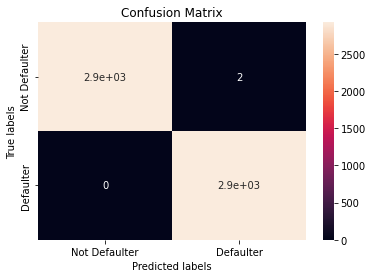

In [173]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [174]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })


In [175]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]


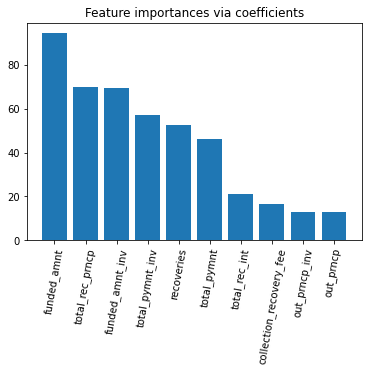

In [176]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [177]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]


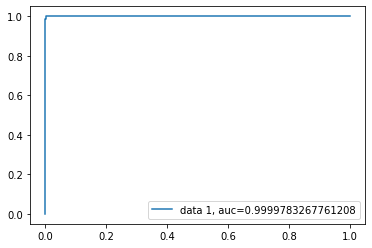

In [178]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## **Implementing XGBoost**

In [179]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

In [180]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [181]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [182]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

[18:27:28] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [183]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=4, microseconds=273242)

In [184]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 

#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [185]:
len(train_class_preds_probs)


5843

In [186]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [187]:
test_class_preds_probs[:20]


array([0.04083339, 0.04083339, 0.04083339, 0.9577767 , 0.04083339,
       0.7680366 , 0.94155574, 0.9583941 , 0.7646182 , 0.04083339,
       0.9583941 , 0.04083339, 0.04083339, 0.9583941 , 0.9583941 ,
       0.04083339, 0.04083339, 0.03980976, 0.9583941 , 0.04083339],
      dtype=float32)

In [188]:
test_class_preds[:20]


[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0]

In [189]:
len(y_train)


5843

In [190]:
len(train_class_preds)


5843

In [191]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9976039705630669
The accuracy on test data is  0.987624750499002


In [192]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.987624750499002
The precision on test data is  0.9976038338658147
The recall on test data is  0.9780736100234926
The f1 on test data is  0.9877421905891658
The roc_score on train data is  0.9878153066404107


## **Hyperparameter Tuning**

In [193]:
from xgboost import  XGBClassifier


In [194]:
X = df_log_reg.drop(['loan_status'],axis=1)
y = df_log_reg['loan_status']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [134]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [135]:
 gsearch1.best_score_

0.9929619646600779

In [136]:
optimal_xgb = gsearch1.best_estimator_

In [137]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [138]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  1.0
The accuracy on test data is  0.9934131736526947


In [139]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.9934131736526947
The precision on test data is  0.9976047904191617
The recall on test data is  0.9893111638954869
The f1 on test data is  0.9934406678592725
The roc_score on train data is  0.9934478524791444


In [140]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

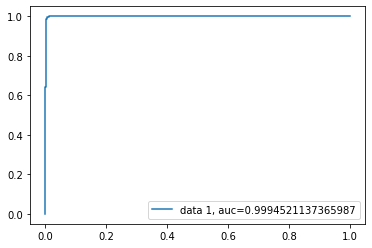

In [141]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
